# Sentiment Analysis - Introduction

## Exploring the Dataset
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api. The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment.

It contains the following 6 fields:

- **target**: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- **ids**: The id of the tweet ( 2087)
- **date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
- **user**: the user that tweeted (robotickilldozr)
- **text**: the text of the tweet (Lyx is cool)

In [53]:
# Path to the unzipped dataset
# TO-DO #1: change path to fit the local address
pathToDataset = r"C:\Petnica\PetnicaNLPWorkshop\Data\training.1600000.processed.noemoticon.csv"

In [54]:
import pandas as pd

# column names in the CSV file
columnNames = ["target", "ids", "date", "flag", "user", "text"]

# if the encoding is not set, the file could not be read
# if the names are not set, the first row is mistaken for a header 
dataset = pd.read_csv(pathToDataset, encoding='cp1252', names=columnNames)

dataset

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Let's observe the distribution between targets inside the dataset:

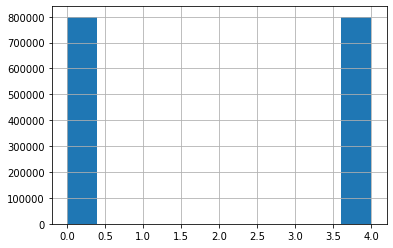

In [55]:
dataset['target'].hist()

## Preparing the dataset

In [56]:
# simplyfing things in the beginning: let's do everything on a much smaller dataset 
dataset = dataset.sample(1000)

In [57]:
# coding the labels into {0, 1} values
dataset["target"] = dataset["target"] / 4

In [58]:
# taking only columns of interest
dataset = dataset[['text', 'target']]

### Split the data into training, validation and test sets

In [59]:
from SplitDataset import SplitDataset

dataset = SplitDataset(dataset)

dataset

,text,target,split
0,Been at the doctor's with my aunt since 8ish. ...,0.0,train
1,@celubs it's not the same watching them withou...,0.0,train
2,Morning everyone! Another glorious day,1.0,train
3,@AdHack So you did! Behind on the blog reading,0.0,train
4,"@johnpicacio Welcome to Twitter, John! (it's ...",1.0,train
...,...,...,...
995,i'm sleepy and sickly and have to be social,0.0,test
996,Star Trek was AWESOME,1.0,test
997,AHH I LOVE MY MOMMY SHE WENT 2 KRISPY KREME JU...,1.0,test
998,@weaverh how do you think I feel? My closest i...,0.0,test


Let's observe the distribution between targets inside each set after the split:

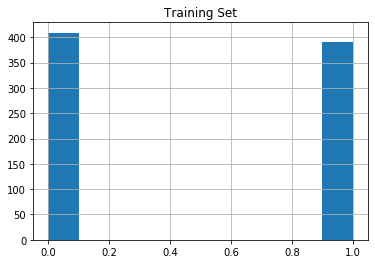

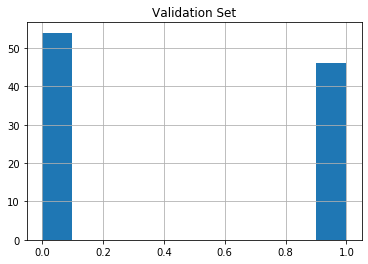

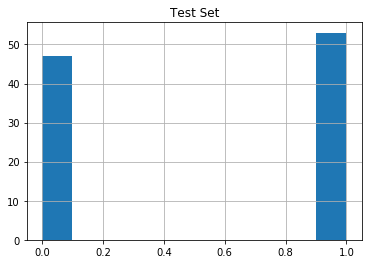

In [60]:
import matplotlib.pyplot as plt

dataset[dataset.split=="train"]['target'].hist()
plt.title("Training Set")
plt.show()

dataset[dataset.split=="validation"]['target'].hist()
plt.title("Validation Set")
plt.show()

dataset[dataset.split=="test"]['target'].hist()
plt.title("Test Set")
plt.show()

### Store the preprocessed dataset

In [61]:
# TO-DO #2: change path to fit the local address
pathToPreprocessedDataset = r"C:\Users\v-tastan\source\repos\PetnicaNLPWorkshop\Data\training.1600000.processed.noemoticon_preprocessed.csv"

In [62]:
dataset.to_csv(pathToPreprocessedDataset, index=False)